<a href="https://colab.research.google.com/github/erfanyeganegi/Linear-Regression-Non-Linear-Transformations/blob/master/01_Linear_Regression_(Gradient_Descent).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(x: np.ndarray, m: float, b: float):
  return m * x + b

In [ ]:
X = np.linspace(-10, 10, 100, endpoint=True)
np.random.shuffle(X)

y = (2*X + 5) + (5 * (np.random.random(size=X.shape[0]) - 0.5))

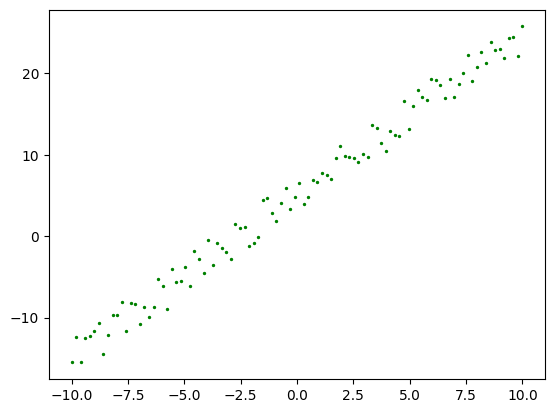

In [ ]:
plt.scatter(X, y, s=2, c='g')

In [ ]:
split_size = int(0.8 * len(X))

X_Train, y_Train = X[:split_size], y[:split_size]
X_Test, y_Test = X[split_size:], y[split_size:]

In [ ]:
X_Train.shape, y_Train.shape, X_Test.shape, y_Test.shape

((80,), (80,), (20,), (20,))

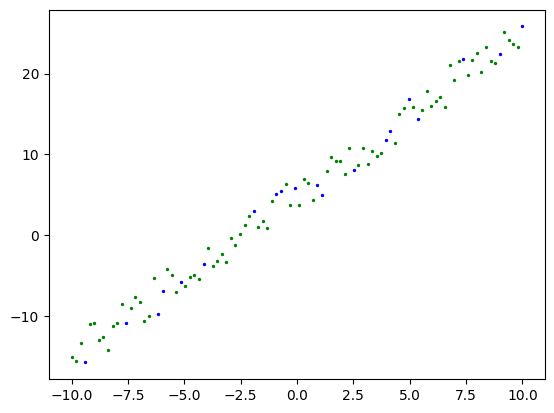

In [ ]:
plt.scatter(X_Train, y_Train, s=2, c='g')
plt.scatter(X_Test, y_Test, s=2, c='b')

In [ ]:
def loss_function(X, y, m, b):
  return np.mean(((f(X, m, b) - y) ** 2))

def loss_function_gradient(X, y, m, b):
  m_grad = 2 * np.mean((f(X, m, b) - y) * X)
  b_grad = 2 * np.mean(f(X, m, b) - y)

  return m_grad, b_grad

loss_function(X, y, 2, 5)

2.0420688926897945

In [ ]:
def perform_gradient_descent(X, y, m, b, lr=0.01):
  m_grad, b_grad = loss_function_gradient(X, y, m, b)

  m = m - lr * m_grad
  b = b - lr * b_grad

  return m, b

In [ ]:
m, b = np.random.random(), np.random.random()

MAX_ITERATIONS = 1_000

iterations = [0]
Train_loss_history = [loss_function(X_Train, y_Train, m, b)]
Test_loss_history = [loss_function(X_Test, y_Test, m, b)]

for i in range(MAX_ITERATIONS):
  m, b = perform_gradient_descent(X_Train, y_Train, m, b)

  Train_loss = loss_function(X_Train, y_Train, m, b)
  Test_loss = loss_function(X_Test, y_Test, m, b)

  iterations.append(i)
  Train_loss_history.append(Train_loss)
  Test_loss_history.append(Test_loss)

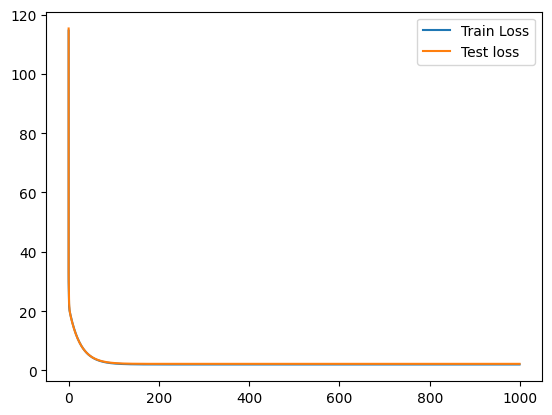

In [ ]:
plt.plot(iterations, Train_loss_history, label="Train Loss")
plt.plot(iterations, Test_loss_history, label="Test loss")
plt.legend()

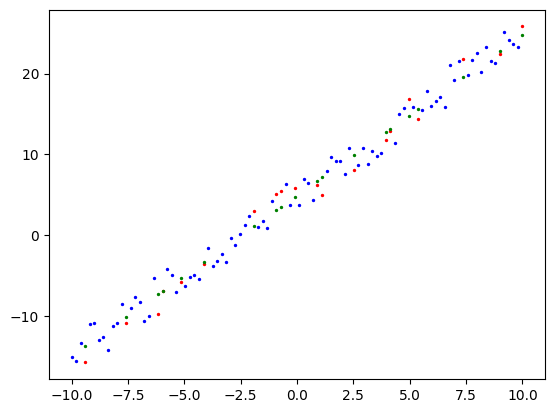

In [ ]:
plt.scatter(X_Train, y_Train, s=2, c='b')
plt.scatter(X_Test, y_Test, s=2, c='r')
plt.scatter(X_Test, f(X_Test, m, b), s=2, c='g')

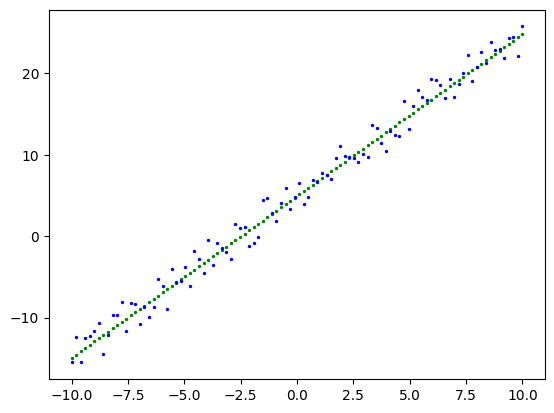

In [ ]:
plt.scatter(X, f(X, m, b), s=2, c='g')
plt.scatter(X, y, s=2, c='b')

In [ ]:
m, b

(1.9808564592879379, 2.121940292486956)